## 2.6 Building model with Deep Learning

## Using Tensorflow to build model

### Isolating Rossmann Store Sales dataset into time series data

In [ ]:
# Importing Necessary Packages
import warnings
warnings.filterwarnings("ignore")

import math
import time
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# temp_train_store_data.sample(4)
rossmann_store_sales = pd.DataFrame()
rossmann_store_sales['Date'] = temp_train_store_data['Date']
rossmann_store_sales['Scaled_Sales'] = temp_train_store_data['Sales']
rossmann_store_sales['Sales'] = train_data['Sales']
rossmann_store_sales.sample(4)

### Checking for Stationality

### Step 1: Check Stationarity Before going any further into our analysis, our series has to be made stationary.
 - Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation etc). if the mean of a tm increases over time, then it not stationary.

### The mean across many time periods is only informative if the expected value is the same across time periods. If these population parameters can vary, what are we really estimating by taking an average across time?

### Stationarity requires that the statistical properties must be the same across time, making the sample average a reasonable way to estimate them.
### Methods to Check Stationarity
 ### 1 Plotting rolling statistics: plotting rolling mean and variance is a first good way to visually inspect our series. If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not stationary.

 ### 2 ACF and PACF plots: An autocorrelation plot (ACF) represent the autocorrelation of the series with lags of itself. A partialACF plot represent the amount of correlation beetween a series and a lag of itself that is not explained by correlations at all lower-order lags Ideally, we want no corralation between the series and lags of itself. Graphically speaking, we would like all the spikes to fall in the blue region.

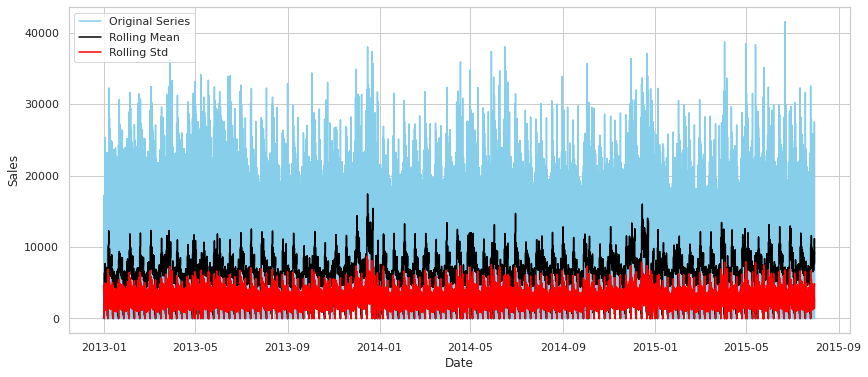

In [75]:
# rossmann_store_sales.plot()
rossmann_df = rossmann_store_sales[['Date', 'Sales']].set_index('Date')

def test_stationarity(tm):
    # plotting rolling statistics
    rollmean = tm.rolling(window=30).mean()
    rollstd = tm.rolling(window=30).std()
    
    plt.figure(figsize=(14, 6))
    plt.plot(tm, color='skyblue', label='Original Series')
    plt.plot(rollmean, color='black', label='Rolling Mean')
    plt.plot(rollstd, color='red', label='Rolling Std')    
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
    # Augmented Dickey-Fuller Test
    adfuller_test = adfuller(tm, autolag='AIC')
    print('Test Statistics = {:.3f}'.format(adfuller_test[0]))
    print('P-value = {:.3f}'.format(adfuller_test[1]))
    print('Critical values :')
    # for key, value in adfuller_test[4].items():
    #     print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value,'' if adfuller_test[0] < value else 'not', 100 - int(key[:-1])))    
    fig, ax = plt.subplots(2, figsize=(14,6))
    ax[0] = plot_acf(tm, ax=ax[0], lags=20)
    ax[1] = plot_pacf(tm, ax=ax[1], lags=20)

test_stationarity(rossmann_df.Sales)

### From the figure it can be deduced that, mean and standar deviation are almost 

In [5]:
adfResult = adfuller(rossmann_store_sales.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

NameError: name 'rossmann_store_sales' is not defined

### Transform the time series data into supervised learning data by creating a new y(target) column. For example as illustrated here in the Sliding Window For Time Series Data section